# Projekt 2 z analizy sygnałów - Karolina Milewska

Importuję potrzebne biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import pylab as py
from  scipy.signal import freqz, group_delay    
from  scipy.signal import butter, buttord      
from  scipy.signal import lfilter, filtfilt

Wczytuję sygnał i wykreślam jego przebieg

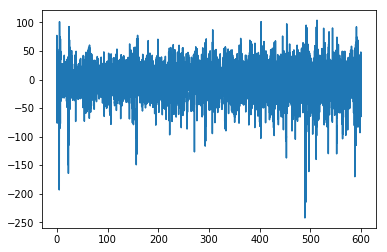

In [2]:
s = np.fromfile ('inb14_fragment.bin', dtype ='float32') 

Fs = 128
dt = 1/Fs
t = np.arange (0, 600, dt)

plt.plot (t, s)
plt.show ()

Filtruje EEG filtrem pasmowo-przepustowym

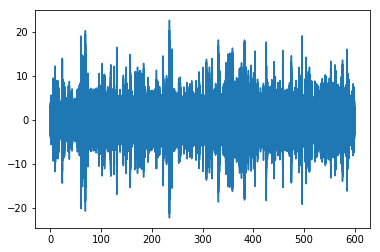

In [3]:
ws1 = 11/(Fs/2)
ws2 = 16/(Fs/2)

f = np.arange(0.01,Fs/2,0.01) 


[b,a] = butter(2, [ws1, ws2],  btype ='bandpass')
sf = filtfilt(b, a, s)

plt.plot(t,sf) #przefiltrowany sygnał
plt.show()

Podnoszę przefiltorwany sygnał do kwadratu i przefiltrowuje filtrem dolnoprzepustowym

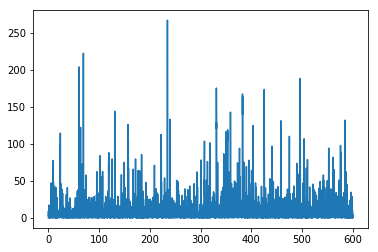

In [4]:
sf_2 = sf ** 2

ws_d = 10/(Fs/2)
[b_d, a_d] = butter (2, ws_d, btype = 'lowpass')

s_d = filtfilt (b_d ,a_d ,sf_2)
plt.plot (t, s_d)
plt.show ()

Pierwiastkuje uzyskany sygnał

C:\Users\karolinamilewska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


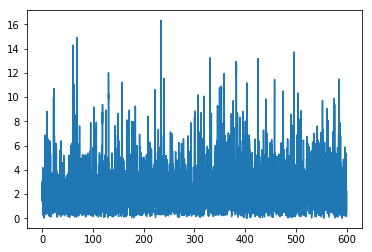

In [5]:
s_p = s_d**(1/2)

plt.plot (t, s_p)
plt.show ()

Szukam wrzecion snu

In [6]:
ilosc_wrzecion = 0
poczatek_wrz = 0
wrzeciona = [] # lista, wktórej będziemy przechowywac 'wrzeciona', zapisujemy poczatek i koniec trwania wrzeciona

for i in range (len (s_p)):
    
    if s_p[i] >=5: # sprawdzamy czy dany fragment ma wartość większą od 5 mikrovoltów
        
        if ilosc_wrzecion == 0: # tworzymy zmienną, dzięki której będziemy sprawdzać czy wartość większa od 5 mikrovoltów pojawia się dłużej niż 0.5 sekundy
            
            poczatek_wrz = i # początek trwania wrzeciona
            ilosc_wrzecion += 1 # sumujemy po kolei momenty, w których wartość jest większa od 5 mikrovoltów
    else:
        
        if i - poczatek_wrz >= Fs/2: # sprawdzamy czy fragment jest dłuższy niż 0.5 sekundy
            
            wrzeciona.append ((poczatek_wrz, i)) # dodajemy poczatek i koniec wrzeciona do listy
            
            ilosc_wrzecion = 0 
            poczatek_wrz = i
            
        else:
            
            ilosc_wrzecion = 0
            poczatek_wrz = i 
            
print ('Ilość wrzecion: ', len(wrzeciona))

Ilość wrzecion:  18


In [7]:
def TFRPlot(TFR, t_mapy, f_mapy, sig, Fs=128,title =''):
    
    df = f_mapy[1]-f_mapy[0]
    dt = t_mapy[1]-t_mapy[0]
    t = np.arange(0,len(sig))/Fs
    sygAxes = py.axes([0.05, 0.05, 0.8, 0.1])
    tfAxes = py.axes([0.05, 0.15, 0.8, 0.8])
    sygAxes.plot(t,sig)
    py.xlim((t_mapy.min(), t_mapy.max()))
    py.setp(sygAxes, yticklabels=[])
   
    tfAxes.imshow(TFR,aspect='auto',origin='lower',interpolation='nearest', 
                  extent=(t_mapy.min()-dt/2,t_mapy.max()+dt/2,f_mapy.min()-df/2,f_mapy.max()+df/2))
    py.setp(tfAxes,xticklabels=[])
    py.title(title)
    py.show()

In [8]:
PlikSygnalu = 'inb14_fragment.bin' 
liczbaProbek_w_Epoce = 20*Fs 
liczbaKanalow = 1            
wybraneKanaly = 1           
wybraneEpoki = '1-30'            
maxIteracji = 50            
procentEnergii = 95.        
energyError    = 0.1 # 0.1 lub 0.01        
algorytm = 'SMP'

PlikKonfigu = 'inb14_fragment.set'
fo = open(PlikKonfigu, "wt")
fo.write( '# OBLIGATORY PARAMETERS\n')
fo.write( 'nameOfDataFile  ' + PlikSygnalu + '\n')
fo.write( 'nameOfOutputDirectory  ./\n')
fo.write( 'writingMode            CREATE \n') # 
fo.write( 'samplingFrequency      ' + str(Fs)+ '\n')
fo.write( 'numberOfChannels       ' + str(liczbaKanalow) + '\n')
fo.write( 'selectedChannels       ' + str(wybraneKanaly) + '\n')
fo.write( 'numberOfSamplesInEpoch ' + str(liczbaProbek_w_Epoce)+ '\n')
fo.write( 'selectedEpochs         ' + str(wybraneEpoki) + '\n')
fo.write( 'typeOfDictionary       OCTAVE_FIXED\n')
fo.write( 'energyError            ' + str(energyError)+' 100.0 \n')
fo.write( 'randomSeed             auto \n')
fo.write( 'reinitDictionary       NO_REINIT_AT_ALL \n')
fo.write( 'maximalNumberOfIterations ' +str(maxIteracji)+ '\n')
fo.write( 'energyPercent             ' +str(procentEnergii)+ '\n')
fo.write( 'MP                        ' + algorytm + '\n')
fo.write( 'scaleToPeriodFactor       1.0 \n')
fo.write( 'pointsPerMicrovolt        1.0 \n')

fo.write( '\n# ADDITIONAL PARAMETERS\n')
fo.write( 'normType                  L2 \n') 
fo.write( 'diracInDictionary         YES \n') 
fo.write( 'gaussInDictionary         YES \n')
fo.write( 'sinCosInDictionary        YES \n')
fo.write( 'gaborInDictionary         YES \n')
fo.close()

In [9]:
import os
os.system('.\empi-win64.exe ' + PlikKonfigu)

0

In [10]:
from book_reader import *
bookName = 'inb14_fragment_smp.b'
book = BookImporter(bookName)

In [11]:
N = int(book.fs)
Eatoms = 0
f = np.linspace(0, Fs / 2, N)
rec_t = np.zeros((1,book.epoch_s))
rec_f = np.zeros((int(book.fs),1))

mapaEnergii = np.zeros(( int(book.fs), book.epoch_s))
rekonstrukcja = np.zeros(book.epoch_s) 
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) 
numerEpoki = 30                                             
for atom in book.atoms[numerEpoki]:     
    f_Hz  = atom['params']['f']*book.fs/2     
    A     = atom['params']['amplitude']       
    faza  = atom['params']['phase']           
    t0    = atom['params']['t']/book.fs       
    skala = atom['params']['scale']/book.fs   
   
    rec_t[0,:] = np.exp(-np.pi*((t-t0)/skala)**2)     
    rec_f[:,0] = np.exp(-np.pi*((f-f_Hz)*skala)**2)   
    tfr_atom = np.kron(rec_t,rec_f) 
    tfr_atom/= np.sum(np.sum(tfr_atom))  
    tfr_atom *= atom['params']['modulus']**2 
    mapaEnergii += tfr_atom
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza)

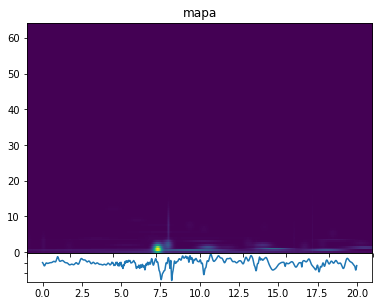

In [12]:
TFRPlot(mapaEnergii, t, f, rekonstrukcja, Fs=Fs, title ='mapa') 